In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('boston_house_prices.csv', skiprows=1)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
import seaborn as sns
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

C:\Users\js2-3\AppData\Local\Temp\ipykernel_10484\3915688033.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\js2-3\AppData\Local\Temp\ipykernel_10484\3915688033.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\js2-3\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\js2-3\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


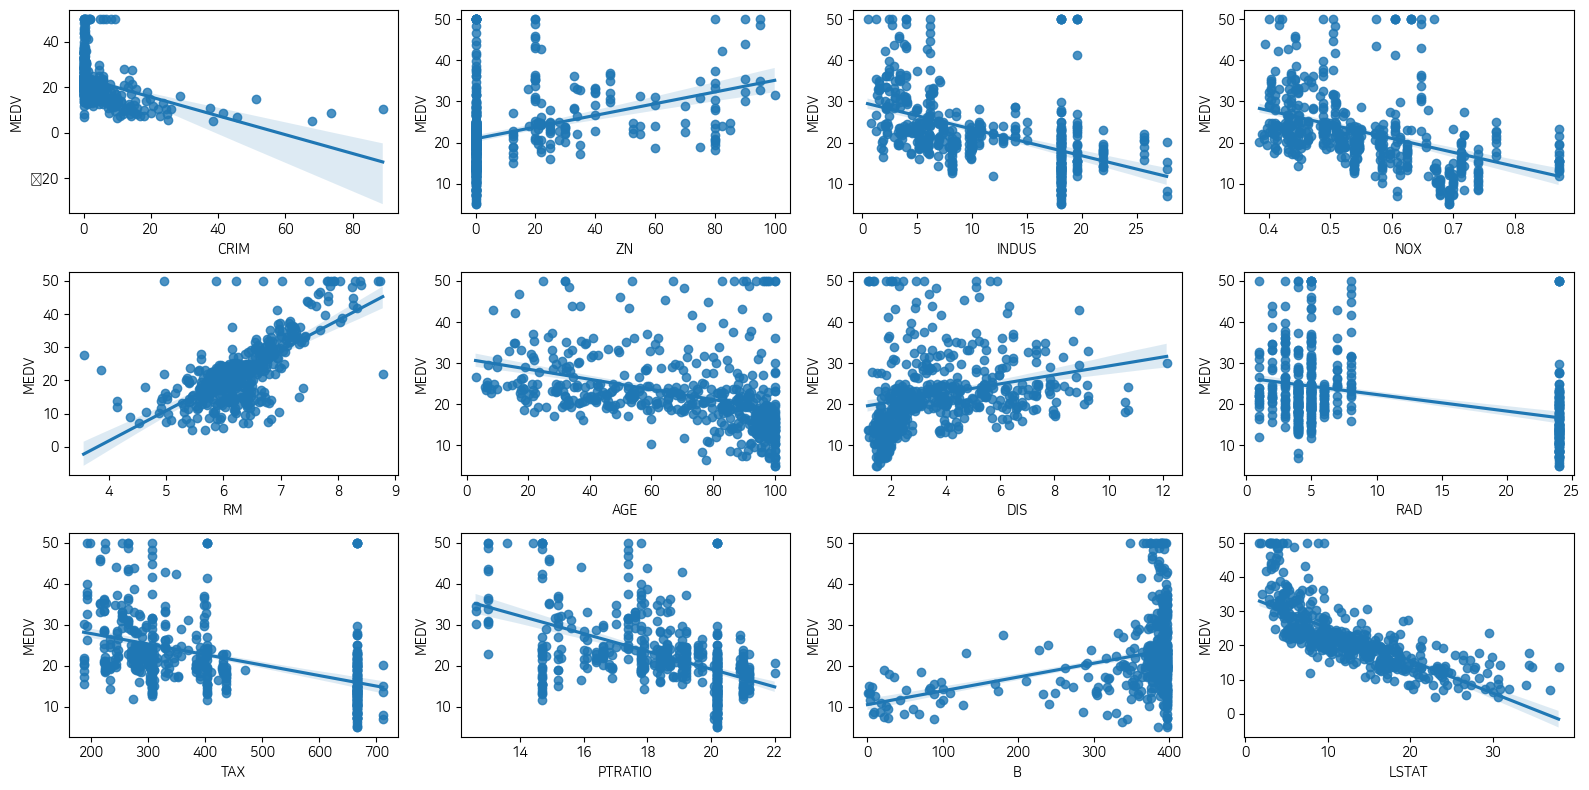

In [23]:
fig, axs = plt.subplots(figsize= (16,8), ncols=4, nrows=3)
lm_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
for i, features in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=features, y='MEDV', data=df, ax=axs[row][col])
    plt.tight_layout()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [25]:
x = df.drop(columns='MEDV')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print(f'mse:\t{mse}\nmae:\t{mae}\nrmse:\t{rmse}\nr2:\t{r2}')

mse:	17.296915907902097
mae:	3.2136683441244505
rmse:	4.158956107955709
r2:	0.7572263323138929


In [26]:
lr.intercept_

40.99559517216467

In [27]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [28]:
np.round(lr.coef_,1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [29]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [39]:
from sklearn.preprocessing import PolynomialFeatures
x = np.arange(4).reshape(2, 2)
x

array([[0, 1],
       [2, 3]])

In [41]:
poly = PolynomialFeatures(degree=2)
poly_ftr = poly.fit_transform(x)
poly_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [43]:
x = df.drop(columns='MEDV')
y = df['MEDV']
oly = PolynomialFeatures(degree=2)
poly_ftr = poly.fit_transform(x)
poly_ftr.shape

(506, 105)

In [45]:
df.shape

(506, 14)

In [97]:
from sklearn.linear_model import Ridge

# 일반 선형 회귀
ridge = Ridge(alpha=0.524)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
print(f"mse: {mean_squared_error(y_test, pred)}")
np.round(ridge.coef_, 1)

mse: 17.17927612389533


array([ -0.1,   0.1,   0. ,   2.9, -13.5,   3.4,   0. ,  -1.6,   0.3,
        -0. ,  -0.8,   0. ,  -0.6])

In [98]:
from sklearn.linear_model import Ridge

# 일반 선형 회귀
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
print(f"mse: {mean_squared_error(y_test, pred)}")

np.round(ridge.coef_, 1)

mse: 17.69867986821104


array([-0.1,  0.1, -0. ,  2. , -2. ,  3.2, -0. , -1.5,  0.3, -0. , -0.7,
        0. , -0.6])

In [85]:
from sklearn.linear_model import Lasso, ElasticNet

In [104]:
lasso = Lasso(alpha=0.012)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
print(f"mse: {mean_squared_error(y_test, pred)}")
np.round(lasso.coef_, 1)

mse: 17.177060595850556


array([ -0.1,   0.1,   0. ,   2.8, -15.9,   3.4,   0. ,  -1.7,   0.3,
        -0. ,  -0.9,   0. ,  -0.6])

In [112]:
elasic = ElasticNet(alpha=0.003, l1_ratio=0.524)
elasic.fit(X_train, y_train)
pred = elasic.predict(X_test)
print(f"mse: {mean_squared_error(y_test, pred)}")
np.round(elasic.coef_, 1)

mse: 17.176953066241236


array([ -0.1,   0.1,   0. ,   2.9, -13.3,   3.4,   0. ,  -1.6,   0.3,
        -0. ,  -0.8,   0. ,  -0.6])